In [1]:
import kagglehub
nafishamoin_new_bangladeshi_crop_disease_path = kagglehub.dataset_download('nafishamoin/new-bangladeshi-crop-disease')

print('Data source import complete.')


c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.


In [2]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tensorflow import keras
import glob as gb
import pandas as pd
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import RandomFlip, RandomRotation
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D ,LeakyReLU

In [3]:
IMG_SIZE = (299, 299) # resolution
directory =r"C:\Users\aksha\Desktop\smalldata"
BATCH_SIZE = 128
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='training',
                                             color_mode='rgb',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             labels='inferred',
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.1,
                                             subset='validation',
                                             color_mode='rgb',
                                             seed=42)


Found 348 files belonging to 2 classes.
Using 314 files for training.
Found 348 files belonging to 2 classes.
Using 34 files for validation.


In [4]:
class_names = train_dataset.class_names
class_names

['TestData', 'TrainData']

Folders: ['BrownSpotztestImg.jpg', 'HealthyTestImg.jpg', 'HispaTestImg.jpg', 'IMG_20231014_171507.jpg', 'LeafBlastTestImg.jpg', 'LeafScaldTestImg.jpg', 'TestData', 'TrainData']
Data counts: [1, 1, 1, 1, 1, 1, 1, 1]


C:\Users\aksha\AppData\Local\Temp\ipykernel_10376\305951665.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= folder_names, y=Data_imbalance, palette="rocket")


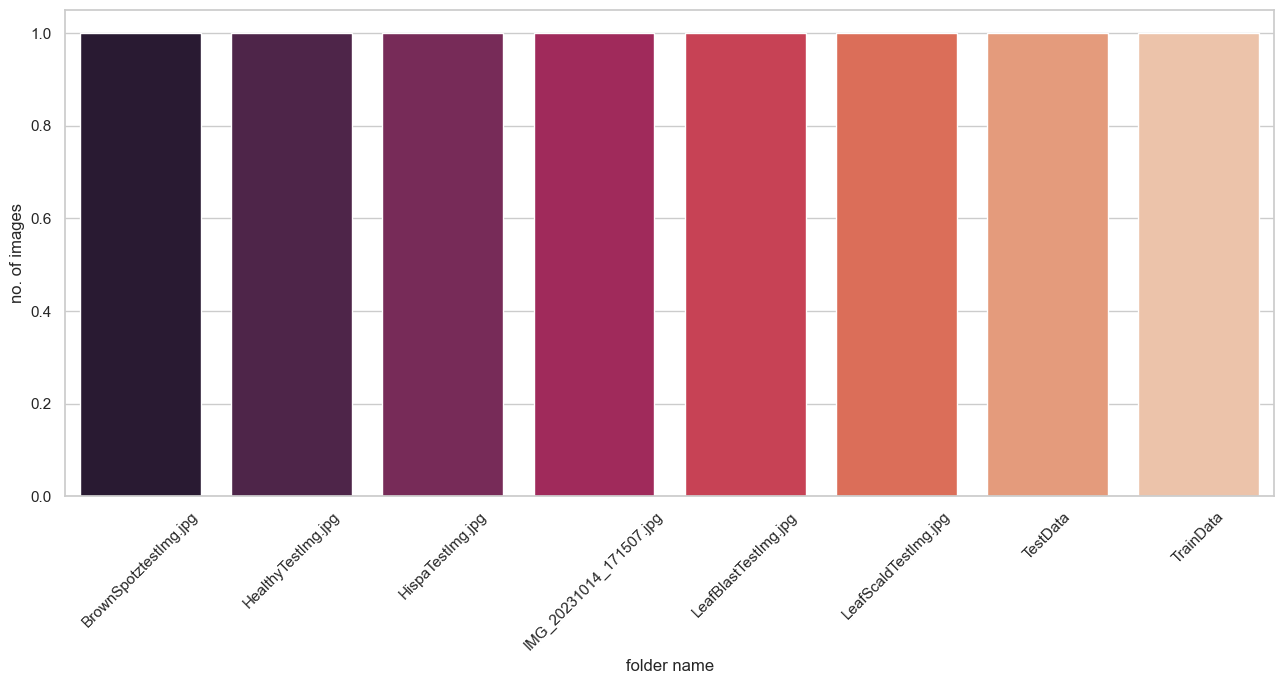

In [5]:
import seaborn as sns
import os
import glob as gb
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
directory = r"C:\Users\aksha\Desktop\smalldata" 
Data_imbalance = []
folder_names=[]

for folder in os.listdir(directory):
    files = gb.glob(pathname=os.path.join(directory, folder, "."))

    Data_imbalance.append(len(files))
    folder_names.append(folder)

print("Folders:", os.listdir(directory))
print("Data counts:", Data_imbalance)

plt.figure(figsize=(13,7))
sns.barplot(x= folder_names, y=Data_imbalance, palette="rocket")
plt.xticks(rotation=45)
plt.xlabel("folder name")
plt.ylabel("no. of images")
plt.tight_layout()
plt.show()

In [6]:
total = 0
for i in range(0,len(Data_imbalance)) :
    total +=Data_imbalance[i]

weight_for_0 = (1 / Data_imbalance[0]) * (total / 4.0)
weight_for_1 = (1 / Data_imbalance[1]) * (total / 4.0)
weight_for_2 = (1 / Data_imbalance[2]) * (total / 4.0)
weight_for_3 = (1 / Data_imbalance[3]) * (total / 4.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))
print('Weight for class 3: {:.2f}'.format(weight_for_3))


Weight for class 0: 2.00
Weight for class 1: 2.00
Weight for class 2: 2.00
Weight for class 3: 2.00


In [7]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal"),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2),
])

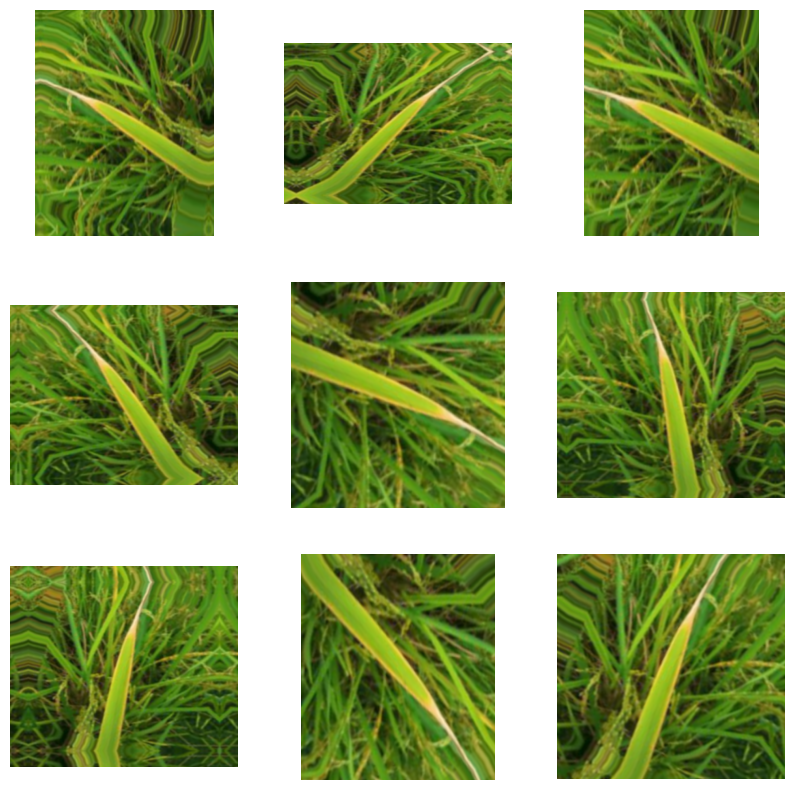

In [8]:
for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
Leaf_Blast = []
Leaf_scald = []
Rice_Hispa =[]
for images , labels in train_dataset.take(1):
    for i in range(len(images)):
        if class_names[labels[i]] == "Leaf_Blast":
            Leaf_Blast.append(images[i].numpy().astype("uint8"))
        if  class_names[labels[i]] == "Leaf_scald":
            _Leaf_scald.append(images[i].numpy().astype("uint8"))
        if  class_names[labels[i]] == "Rice_Hispa":
            Rice_Hispa.append(images[i].numpy().astype("uint8"))

for i in range(len(Leaf_Blast)):
    plt.subplot(2,5,i+1)
    plt.imshow(Leaf_Blast[i])
    plt.axis("off")
    plt.title("leaf blast")

<Figure size 2000x800 with 0 Axes>

In [10]:
plt.figure(figsize=(20,8))
for i in range(len(Rice_Hispa)):
    plt.subplot(2,5,i+1)
    plt.imshow(Rice_Hispa[i])
    plt.axis("off")
    plt.title("Rice Hispa")

<Figure size 2000x800 with 0 Axes>

In [11]:
plt.figure(figsize=(20,8))
for i in range(len(Leaf_scald)):
    plt.subplot(2,5,i+1)
    plt.imshow(Leaf_scald[i])
    plt.axis("off")
    plt.title(" Leaf scald")
plt.show()

<Figure size 2000x800 with 0 Axes>

In [12]:
IMG_SHAPE = IMG_SIZE +(3,)
base_model = tf.keras.applications.InceptionV3(input_shape=IMG_SHAPE, include_top= False,weights='imagenet')

type(base_model)
preprocess_input = tf.keras.applications.inception_v3.preprocess_input

In [13]:
nb_layers = len(base_model.layers)
print("Numbers of Layers =" , nb_layers)
print(base_model.layers[nb_layers - 2].name)  # pre- Last name
print(base_model.layers[nb_layers - 1].name)

Numbers of Layers = 311
activation_93
mixed10


In [14]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(r"C:\Users\aksha\Desktop\smalldata",image_size=(299,299),batch_size=32)
image_batch, label_batch = next(iter(train_dataset))  # 32 image arrays"C:\Users\aksha\Desktop\smalldata"
feature_batch = base_model(image_batch)  # run the model on those 32 image (base model with its 1000 causes classification)
print(feature_batch.shape)

Found 348 files belonging to 2 classes.
(32, 8, 8, 2048)


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models


input_shape = (299, 299, 3)
num_classes = 3  


model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# COMPILE with correct loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  
              metrics=['accuracy'])

# Train the model (with class weights)
history = model.fit(train_dataset,
                    epochs=10,
                    verbose=2,
                    class_weight=class_weight) 

Epoch 1/10
11/11 - 28s - 3s/step - accuracy: 0.6552 - loss: 10193.4795
Epoch 2/10
11/11 - 15s - 1s/step - accuracy: 0.8247 - loss: 1319.1194
Epoch 3/10
11/11 - 14s - 1s/step - accuracy: 0.7414 - loss: 190.9306
Epoch 4/10
11/11 - 14s - 1s/step - accuracy: 0.6839 - loss: 206.4562
Epoch 5/10
11/11 - 14s - 1s/step - accuracy: 0.8793 - loss: 20.9722
Epoch 6/10
11/11 - 15s - 1s/step - accuracy: 0.8966 - loss: 10.2907
Epoch 7/10
11/11 - 13s - 1s/step - accuracy: 0.9080 - loss: 11.1953
Epoch 8/10
11/11 - 13s - 1s/step - accuracy: 0.9195 - loss: 12.2067
Epoch 9/10
11/11 - 14s - 1s/step - accuracy: 0.9856 - loss: 0.7516
Epoch 10/10
11/11 - 14s - 1s/step - accuracy: 0.9828 - loss: 0.9501


In [16]:
model.evaluate(validation_dataset , verbose = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00   


[0.0, 1.0]

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 297, 297, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 700928)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    44,859,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,581,643 (513.39 MB)

 Trainable params: 44,860,547 (171.13 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 89,721,096 (342.26 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


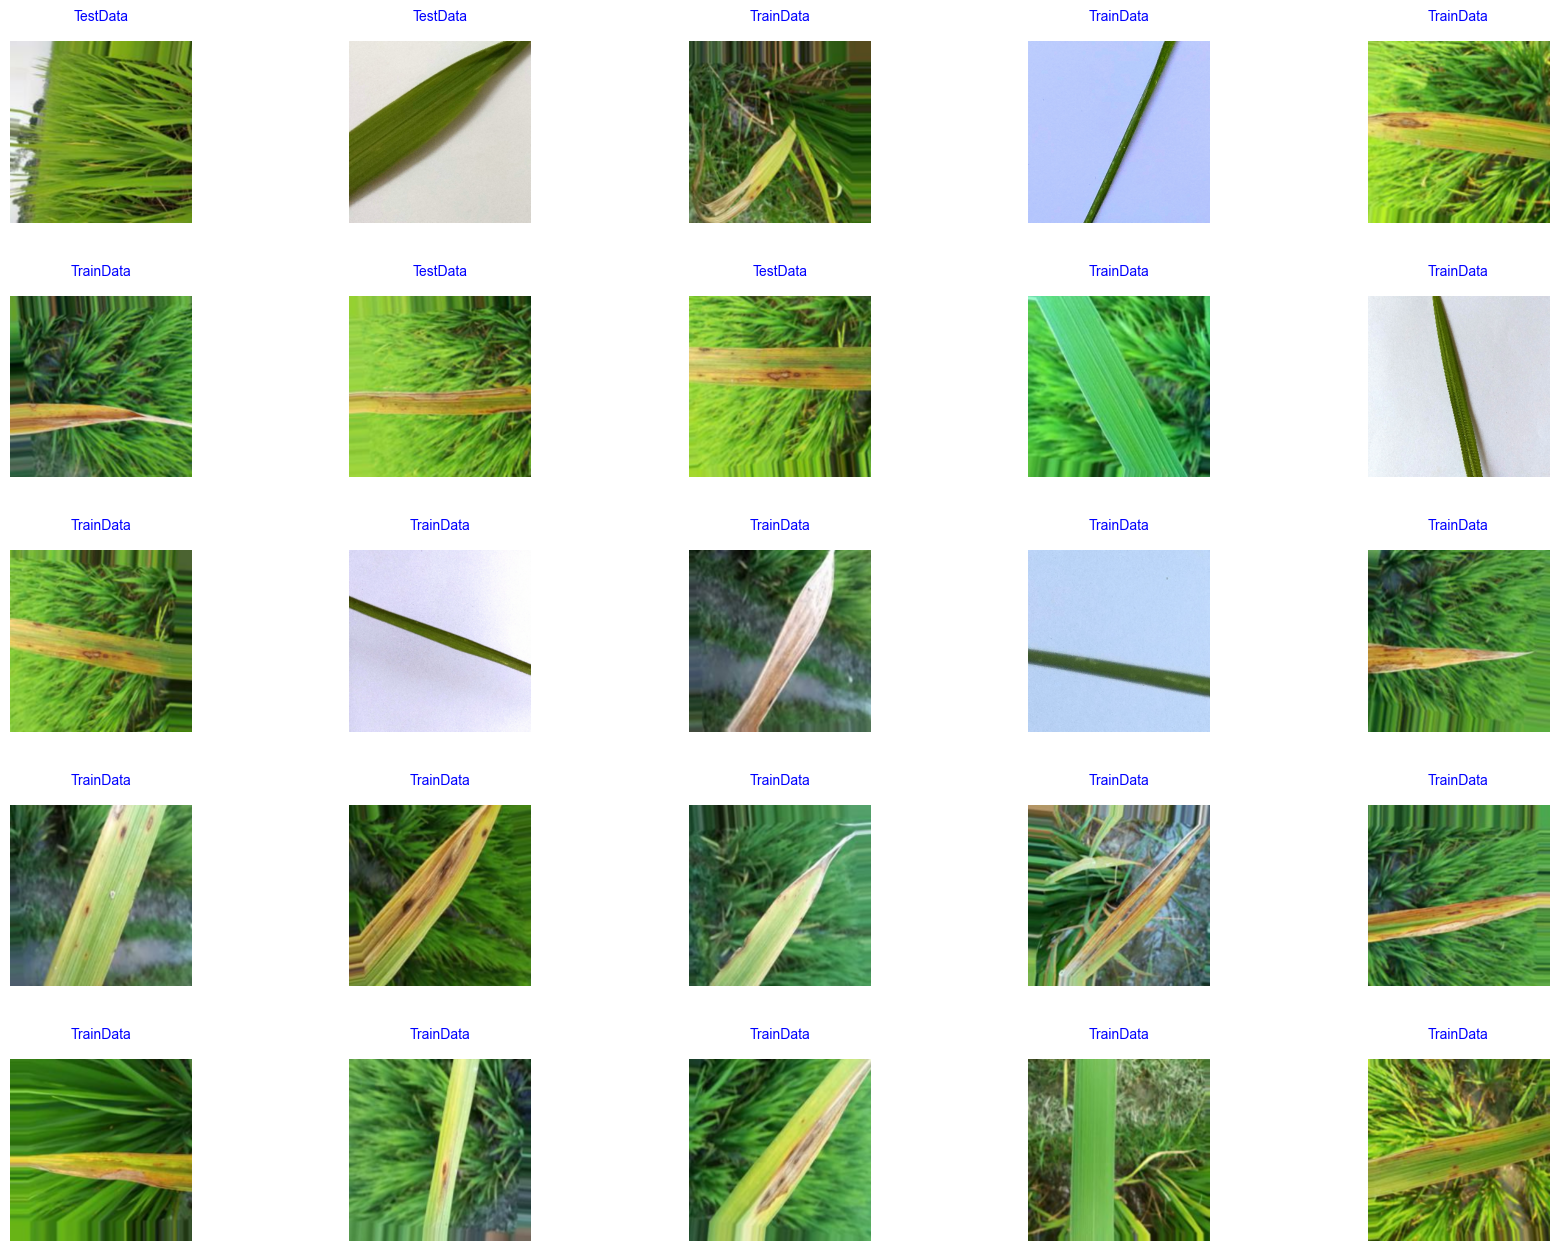

In [18]:
plt.figure(figsize=(20, 15))
for images, labels in train_dataset.take(1):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
        im2 = images[i].numpy().astype("uint8")
        img2 = tf.expand_dims(im2, 0)
        predict = model.predict(img2)
        predicted= class_names[np.argmax(predict)]
        actual = class_names [labels[i].numpy().astype("uint8")]
        if (actual == predicted):
            plt.title(predicted, fontsize=10, color= 'blue', pad=15);
        else :
            plt.title(actual, fontsize=10, color= 'red' ,pad=15);
        plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9,
                            top=0.9, wspace=0.4,hspace=0.4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

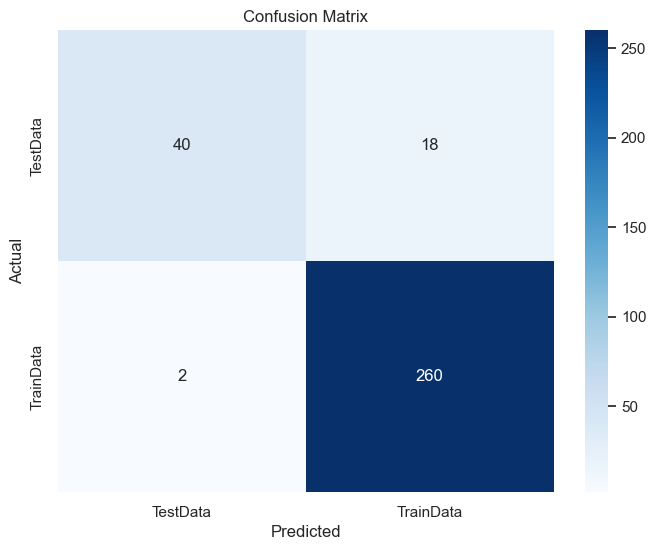

In [19]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to collect true and predicted labels
true_labels = []
predicted_labels = []

# Loop through dataset (e.g., 1 batch at a time)
for images, labels in train_dataset.take(10):  # adjust `.take(n)` as needed
    for i in range(len(images)):
        img = images[i].numpy().astype("float32") / 255.0
        img = tf.expand_dims(img, 0)  # shape: (1, h, w, 3)

        prediction = model.predict(img)
        pred_class = np.argmax(prediction)
        true_class = labels[i].numpy()

        predicted_labels.append(pred_class)
        true_labels.append(true_class)

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Optionally print classification report
#print(classification_report(true_labels, predicted_labels, target_names=class_names))
len(class_names) == len(set(true_labels + predicted_labels))
print(classification_report(true_labels, predicted_labels,target_names=class_names))
#len(class_names) == len(set(true_labels + predicted_labels))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\aksha\Desktop\smalldata",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(299, 299),
    batch_size=32
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:\Users\aksha\Desktop\smalldata",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(299, 299),
    batch_size=32
)


Found 348 files belonging to 2 classes.
Using 279 files for training.
Found 348 files belonging to 2 classes.
Using 69 files for validation.


In [24]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10


9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_loss: 0.2257
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_loss: 0.2283
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_loss: 0.2294
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_loss: 0.2298
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_loss: 0.2299
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_loss: 0.2300
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_loss: 0.2300
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9855 - val_

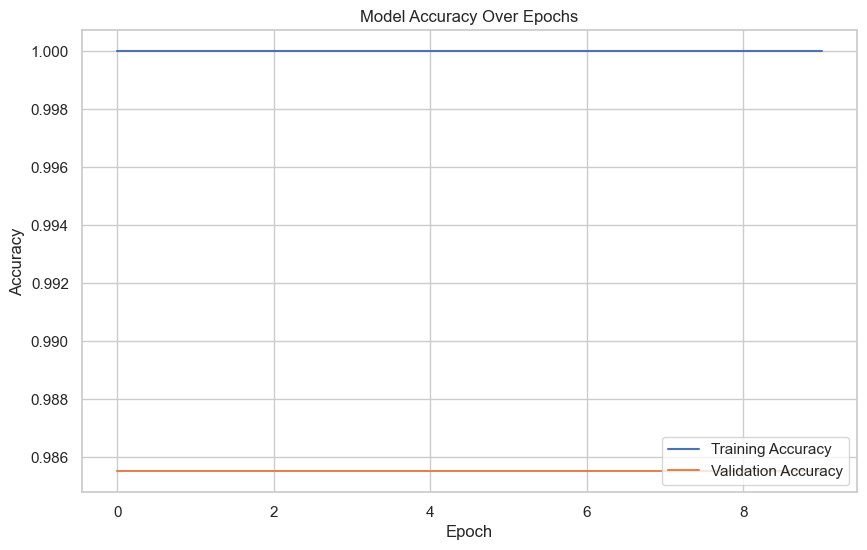

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
